In [1]:
%pylab inline
from pandas import Series, DataFrame
import pandas_datareader.data as web
from app.analysis import Quote, RISK_FREE_RATE_PER_DAY
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
app = create_app()

Populating the interactive namespace from numpy and matplotlib


[2019-11-23 14:32:58,317] INFO in core: Started 


In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series(126)})
data = web.DataReader(['SPY', 'ASHR', 'BABA'], 'yahoo', m1.index[0])['Adj Close']
data = DataFrame({
    '1. M1': m1,
    '2. S&P 500': data['SPY'],
    '3. CSI 300': data['ASHR'],
    '4. Alibaba': data['BABA'],
}).dropna()
for key in data.columns:
    data[key] *= 100 / data[key][0]

,count,mean,std,min,25%,50%,75%,max,sharpe,yield,drawdown,skewness,kurtosis
1. M1,96.0,0.038161,0.263185,-0.684763,-0.105861,0.060517,0.203951,0.592210,0.117859,3.002290,3.987423,-0.579981,0.609898
2. S&P 500,96.0,0.051083,0.323417,-1.186224,-0.148014,0.110476,0.248691,0.706355,0.135863,4.550203,6.022979,-0.984879,1.920392
3. CSI 300,96.0,0.003378,0.544214,-1.971585,-0.281284,0.018409,0.305876,1.023497,-0.006918,-2.979321,10.234841,-0.613813,1.467336
4. Alibaba,96.0,0.082898,0.903459,-2.744218,-0.439287,0.233491,0.602461,2.293916,0.083850,6.933074,14.025963,-0.503707,0.609957


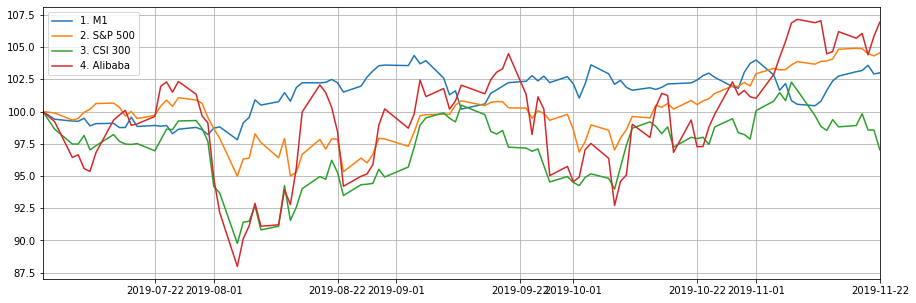

In [3]:
period = 5
data.plot(figsize=(15, 5), grid=1)
ret = data.rolling(period, period - 1).mean().pct_change() * 100
stat = ret.describe().T
stat['sharpe'] = (stat['mean'] - RISK_FREE_RATE_PER_DAY) / stat['std']
stat['yield'] = data.T[data.index[-1]] / data.T[data.index[0]] * 100 - 100
stat['drawdown'] = data.apply(Quote._max_drawdown)
stat['skewness'] = ret.skew()
stat['kurtosis'] = ret.kurt()
stat.sort_values('drawdown', ascending=True)

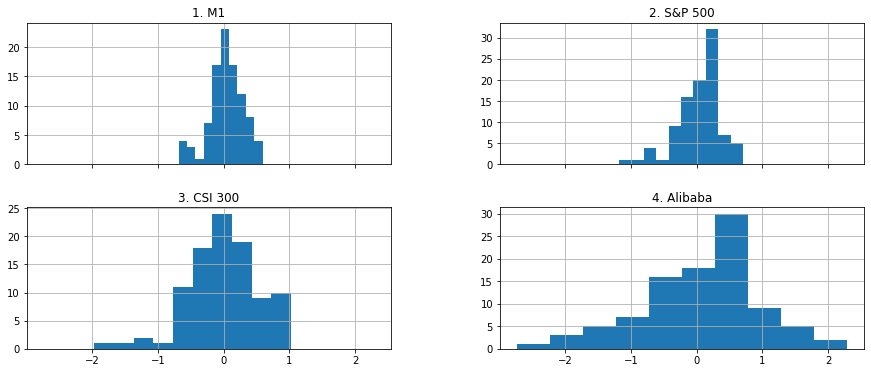

In [4]:
_ = ret.hist(sharex=1, figsize=(15, 6), layout=(2, 2))